In [1]:
import nltk
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize
from math import log, sqrt


In [2]:
#importimg the dataset
data=pd.read_csv(r'C:\Users\admin\Desktop\deep nlp\emailspam\spam.csv', encoding='latin-1')

In [3]:
#clean the dataset as we do not need the coloumn unmaed2,3,4
data=data.drop(['Unnamed: 4','Unnamed: 3','Unnamed: 2'], axis=1)

In [4]:
#now rename the coloumn column ‘v1’ as ‘label’ and ‘v2’ as ‘message’
data = data.rename(columns = {'v1':'label','v2':'message'})
data=data.replace({'ham': 0, 'spam': 1})

In [5]:
data.head(2)

,label,message
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...


In [7]:
#now we can go ahead preprocess our text data
import string
def text_process(mess):
    nopunc =[char for char in mess if char not in string.punctuation]
    nopunc=''.join(nopunc)
    return [word for word in nopunc.split() if word.lower() not in stopwords.words('english')]
data['message'].head(5).apply(text_process)

0    [Go, jurong, point, crazy, Available, bugis, n...
1                       [Ok, lar, Joking, wif, u, oni]
2    [Free, entry, 2, wkly, comp, win, FA, Cup, fin...
3        [U, dun, say, early, hor, U, c, already, say]
4    [Nah, dont, think, goes, usf, lives, around, t...
Name: message, dtype: object

In [8]:
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report,confusion_matrix

In [10]:
msg_train, msg_test, class_train, class_test = train_test_split(data['message'],data['label'],test_size=0.2)

In [12]:
pipeline = Pipeline([
    ('bow',CountVectorizer(analyzer=text_process)), # converts strings to integer counts
    ('tfidf',TfidfTransformer()), # converts integer counts to weighted TF-IDF scores
    ('classifier',MultinomialNB()) # train on TF-IDF vectors with Naive Bayes classifier
])

In [13]:
pipeline.fit(msg_train,class_train)

Pipeline(memory=None,
     steps=[('bow', CountVectorizer(analyzer=<function text_process at 0x000000000BEE4488>,
        binary=False, decode_error='strict', dtype=<class 'numpy.int64'>,
        encoding='utf-8', input='content', lowercase=True, max_df=1.0,
        max_features=None, min_df=1, ngram_range=(1, 1), preprocesso...f=False, use_idf=True)), ('classifier', MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True))])

In [14]:
predictions = pipeline.predict(msg_test)

In [15]:
print(classification_report(class_test,predictions))

             precision    recall  f1-score   support

          0       0.96      1.00      0.98       970
          1       1.00      0.73      0.84       145

avg / total       0.97      0.97      0.96      1115



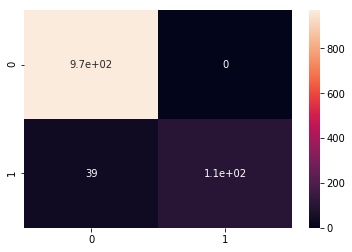

In [16]:
import seaborn as sns
sns.heatmap(confusion_matrix(class_test,predictions),annot=True)